### Домашнее задание к занятию "Функции потерь и оптимизация"

In [214]:
import numpy as np
from pandas import DataFrame
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification

#### Реализуем логистическую регрессию

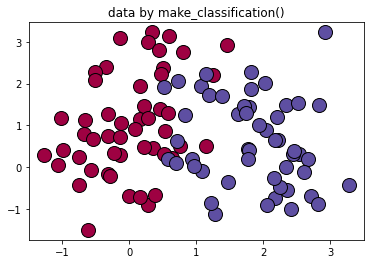

In [215]:
X,y=make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
 
unique_lables=set(y)
colors=plt.cm.Spectral(np.linspace(0, 1, len(unique_lables)))
for k, col in zip(unique_lables, colors):
    x_k=X[y==k]
    plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k",
             markersize=14)
plt.title('data by make_classification()')
plt.show()

In [216]:
X[:5]

array([[ 2.17221697, -0.73380144],
       [ 2.54116921,  0.31055925],
       [-0.00718884, -0.70554359],
       [-0.31285288, -0.17275221],
       [-0.67290531,  0.79310561]])

In [217]:
y[:5]

array([1, 1, 0, 0, 0])

#### Обучаем модель методом градиентного спуска

In [218]:
W = [1,1]

In [219]:
b=0

In [220]:
#Функция сигмоида
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))    
    return z

In [221]:
#Функция расчетов текущих результатов модели
def logistic(X, y, W, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
 
    a = sigmoid(np.dot(X, W) + b)
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
 
    dW = np.dot(X.T, (a-y))/num_train
    db = np.sum(a-y)/num_train
    cost = np.squeeze(cost) 
    return a, cost, dW, db

In [222]:
#Функция обучения модели
def logistic_train(X, y, W, b, learning_rate, epochs):    
    cost_list = []  
    # Обучение модели
    for i in range(epochs):       
        # Рассчитать результат расчета текущей модели, функцию потерь и градиент
        a, cost, dW, db = logistic(X, y, W, b)    
        # Обновление параметров
        W = W -learning_rate * dW
        b = b -learning_rate * db        
        cost_list.append(cost)
        
        # Выводим на экран функцию потерь во время обучения 
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost)) 
    # Сохраняем параметры
    params = {     
        'W': W,            
        'b': b
    }        
    # Сохраняем градиент
    grads = {            
        'dW': dW,            
        'db': db
    }           
    return cost_list, params, grads

In [223]:
cost_list, params, grads = logistic_train(X, y, W, b, 0.01, 1000)

epoch 0 cost 0.831632
epoch 100 cost 0.587438
epoch 200 cost 0.448497
epoch 300 cost 0.380660
epoch 400 cost 0.345646
epoch 500 cost 0.324347
epoch 600 cost 0.309417
epoch 700 cost 0.297976
epoch 800 cost 0.288733
epoch 900 cost 0.281017


In [225]:
params

{'W': array([ 1.73589525, -0.40847278]), 'b': -0.919661079423643}

#### Обучаем модель методом nesterov momentum

In [226]:
#Функция обучения модели (добавляем параметр momentum)
def logistic_mn_train(X, y, W, b, learning_rate, momentum, epochs):    
    cost_list = []
    # Определяем экспоненциальное скользящее среднее для параметров
    dW_t = 0
    db_t = 0
    # Обучение модели
    for i in range(epochs):       
        # Рассчитаем результат расчета текущей модели, функцию потерь и градиент
        a, cost, dW, db = logistic(X, y, W, b)    
       
        # Обновление параметров по формуле nesterov momentum
        dW_t = momentum*dW_t+learning_rate*(1-momentum)*dW
        db_t = momentum*db_t+learning_rate*(1-momentum)*db
        W = W - dW_t
        b = b - db_t        
 
        cost_list.append(cost)   
        # Выводим на экран функцию потерь во время обучения 
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost)) 
    # Сохраняем параметры
    params = {     
        'W': W,            
        'b': b
    }        
    # Сохраняем градиент
    grads = {            
        'dW': dW,            
        'db': db
    }           
    return cost_list, params, grads


In [228]:
cost_list, params, grads = logistic_mn_train(X, y, W, b, 0.9, 0.01, 1000)

epoch 0 cost 0.831632
epoch 100 cost 0.192439
epoch 200 cost 0.185740
epoch 300 cost 0.184238
epoch 400 cost 0.183784
epoch 500 cost 0.183629
epoch 600 cost 0.183572
epoch 700 cost 0.183551
epoch 800 cost 0.183542
epoch 900 cost 0.183539


In [229]:
params

{'W': array([ 4.78463776, -0.70549538]), 'b': -3.2780791546855452}